In [34]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [35]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [38]:
df.head(-5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12
...,...,...
3275,2016-12-22,3
3276,2016-12-23,3
3277,2016-12-24,2
3278,2016-12-25,3


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [39]:
result = df.groupby(df.Day.dt.year).agg('mean')

print(result, '\n')
print('Самый холодный год: ', result.t.index[result.t.argmin()])
print("Самый теплый год: ", result.t.index[result.t.argmax()])

             t
Day           
2008  8.545205
2009  7.610959
2010  7.117808
2011  8.337912
2012  6.980822
2013  8.728767
2014  8.931507
2015  9.079452
2016  7.907104 

Самый холодный год:  2012
Самый теплый год:  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [40]:
t_df = df.loc[(df.t>=0) & (df.Day.dt.month==1)]
result = t_df.groupby(t_df.Day.dt.year).agg('count').t

print(result, '\n')
print('Год, в котором в январе было наибольшее число дней с положительной температурой: ', result.index[result.argmax()])

Day
2008    19
2009    11
2011     5
2012     6
2013     5
2014     8
2015    14
2016     5
Name: t, dtype: int64 

Год, в котором в январе было наибольшее число дней с положительной температурой:  2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [41]:
months = set([6, 7, 8])
print(months)

temp_df = df.loc[(df.Day.dt.month==6) | (df.Day.dt.month==7) | (df.Day.dt.month==8)]
result = temp_df.groupby(temp_df.Day.dt.year).agg('mean').t

print(result, '\n')
print('Год с самым холодным летом: ', result.index[result.argmin()])

{8, 6, 7}
Day
2008    18.119565
2009    18.728261
2010    22.119565
2011    21.318681
2012    19.086957
2013    21.543478
2014    20.706522
2015    19.032609
2016    19.326087
Name: t, dtype: float64 

Год с самым холодным летом:  2008


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [42]:
t_df = df

t_df['$\Delta$ t'] = t_df.t.shift(-1)
t_df['$\Delta$ t'] = t_df.t - t_df['$\Delta$ t']
t_df['$\Delta$ t'] = t_df['$\Delta$ t'].abs()

result = t_df.loc[t_df['$\Delta$ t'].argmax()]

print(result, "\n")
print('Самый большой перепад температуры: ',str(result.Day.date()))

Day           2014-05-26 00:00:00
t                              22
$\Delta$ t                     15
Name: 2334, dtype: object 

Самый большой перепад температуры:  2014-05-26


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

Day
2008    8.545205
2009    7.610959
2010    7.117808
2011    8.337912
2012    6.980822
2013    8.728767
2014    8.931507
2015    9.079452
2016    7.907104
Name: t, dtype: float64 



<AxesSubplot:xlabel='Day'>

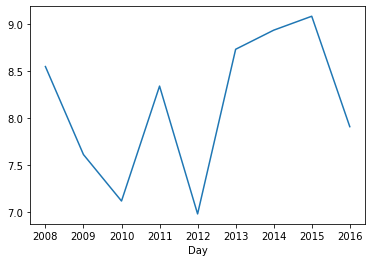

In [46]:
result = df.groupby(df.Day.dt.year).agg('mean')

print(result.t, '\n')

result.t.plot()